In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import os


In [22]:

excel_sheet = r"C:\Users\rayya\OneDrive\Desktop\Programs\Financial-Management-Dataset-\Code\Rayyan\model\params.xlsx"

# Load using openpyxl engine
df = pd.read_excel(excel_sheet, sheet_name="Sheet1")

# Display first few rows
print(df.head())


   Quarter  Total Income From Operations  Employees Cost  depreciat  \
0  Sep '13                         78.26           38.63      55.44   
1  Dec '13                         90.95           43.95      67.07   
2  Mar '14                         79.08           41.18      57.31   
3  Jun '14                         93.17           43.90      58.04   
4  Sep '14                        108.29           42.54      52.49   

   Other Expenses  P/L Before Other Inc. , Int., Excpt. Items & Tax  \
0           27.47                                            -43.28   
1           30.53                                            -50.60   
2           27.76                                            -47.17   
3           41.54                                            -50.31   
4           61.74                                            -48.48   

   Other Income  P/L Before Int., Excpt. Items & Tax  Interest  \
0         21.86                               -21.42     74.56   
1         -1.1

In [26]:
import pandas as pd

# Example data
quarters = [
    "Sep '13", "Dec '13", "Mar '14", "Jun '14", "Sep '14",
    "Dec '14", "Mar '15", "Jun '15", "Sep '15", "Dec '15",
    "Mar '16", "Jun '16", "Sep '16", "Dec '16", "Mar '17",
    "Jun '17", "Sep '17", "Dec '17", "Mar '18", "Jun '18",
    "Sep '18", "Dec '18", "Mar '19", "Jun '19", "Sep '19",
    "Dec '19", "Mar '20", "Jun '20", "Sep '20", "Dec '20",
    "Mar '21", "Jun '21", "Sep '21", "Dec '21", "Mar '22",
    "Jun '22", "Sep '22", "Dec '22", "Mar '23", "Jun '23",
    "Sep '23", "Dec '23", "Mar '24", "Jun '24", "Sep '24"
]
 # Add all values
df = pd.DataFrame({'Quarter': quarters})

# Convert "Sep '13" format to datetime (setting it to the first day of the quarter)
df['ds'] = pd.to_datetime(df['Quarter'], format="%b '%y") + pd.offsets.QuarterBegin(0)

print(df.head())


   Quarter         ds
0  Sep '13 2013-09-01
1  Dec '13 2013-12-01
2  Mar '14 2014-03-01
3  Jun '14 2014-06-01
4  Sep '14 2014-09-01


In [32]:
import pandas as pd
from prophet import Prophet

# Load dataset
file_path = r"C:\Users\rayya\OneDrive\Desktop\Programs\Financial-Management-Dataset-\Code\Rayyan\model\params.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Convert Quarter format to datetime
df['ds'] = pd.to_datetime(df['Quarter'], format='%b \'%y')  # Example: 'Sep '13' -> 2013-09-01

# Set target variable
df['y'] = df["Net Profit"]

# Drop original quarter column
df = df[['ds', 'y']]  

# Print to check
print(df.head())


          ds       y
0 2013-09-01  -97.48
1 2013-12-01 -139.44
2 2014-03-01 -121.33
3 2014-06-01 -105.21
4 2014-09-01 -100.40


In [33]:
# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(df)

# Create future dataframe for prediction
future = model.make_future_dataframe(periods=4, freq='Q')  # Predict next 4 quarters

# Make predictions
forecast = model.predict(future)

# Display predictions
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


00:04:03 - cmdstanpy - INFO - Chain [1] start processing
00:04:04 - cmdstanpy - INFO - Chain [1] done processing


           ds         yhat   yhat_lower   yhat_upper
0  2013-09-01  -110.581940  -327.388154    98.464946
1  2013-12-01  -112.576515  -334.818262    89.876703
2  2014-03-01  -144.601097  -349.167731    86.927802
3  2014-06-01   -88.517887  -300.338418   133.239291
4  2014-09-01  -107.927172  -330.819038   123.513624
5  2014-12-01  -183.645035  -407.690262    24.064020
6  2015-03-01   -96.971878  -314.994559   123.246643
7  2015-06-01   -83.559546  -305.106735   128.658314
8  2015-09-01  -106.208743  -341.551937   110.555554
9  2015-12-01  -253.849046  -476.666610   -38.077995
10 2016-03-01  -196.669301  -393.132587    13.328027
11 2016-06-01   -34.414871  -270.374460   172.409743
12 2016-09-01   -54.523642  -261.831026   158.470365
13 2016-12-01    18.862419  -194.472515   233.255881
14 2017-03-01  -138.090836  -369.897871    79.526961
15 2017-06-01   -32.374709  -252.556298   182.063936
16 2017-09-01   -50.941739  -277.948502   146.756856
17 2017-12-01   -52.936314  -275.382150   161.

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


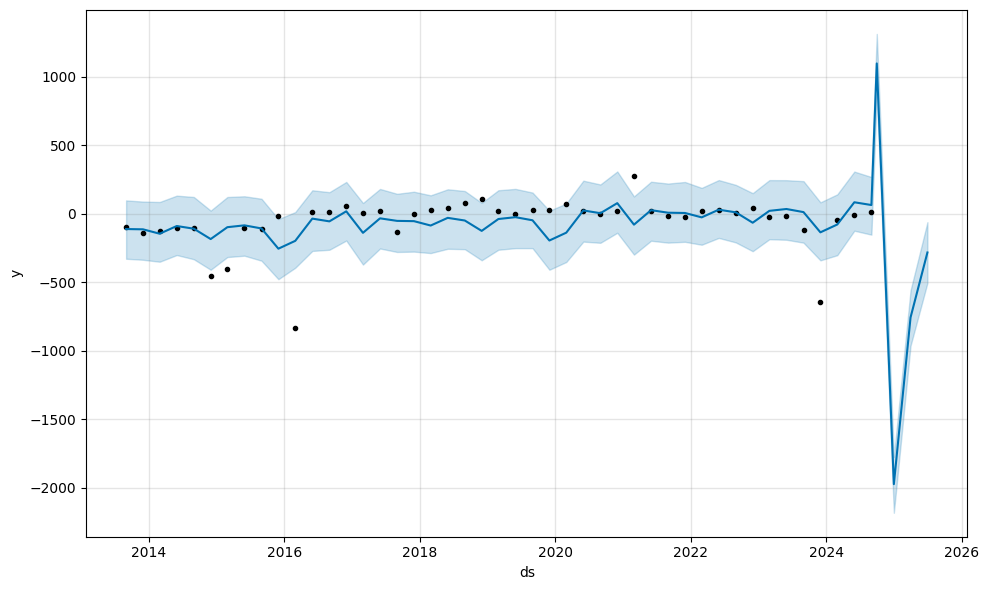

In [34]:
import matplotlib.pyplot as plt

# Plot results
model.plot(forecast)
plt.show()


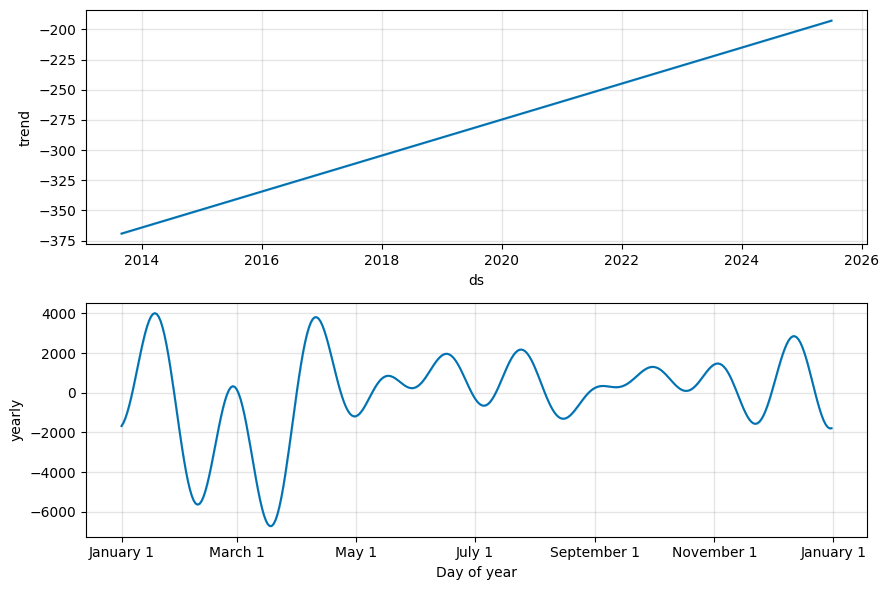

In [37]:

# Plot components (trend, seasonality)
model.plot_components(forecast)
plt.show()


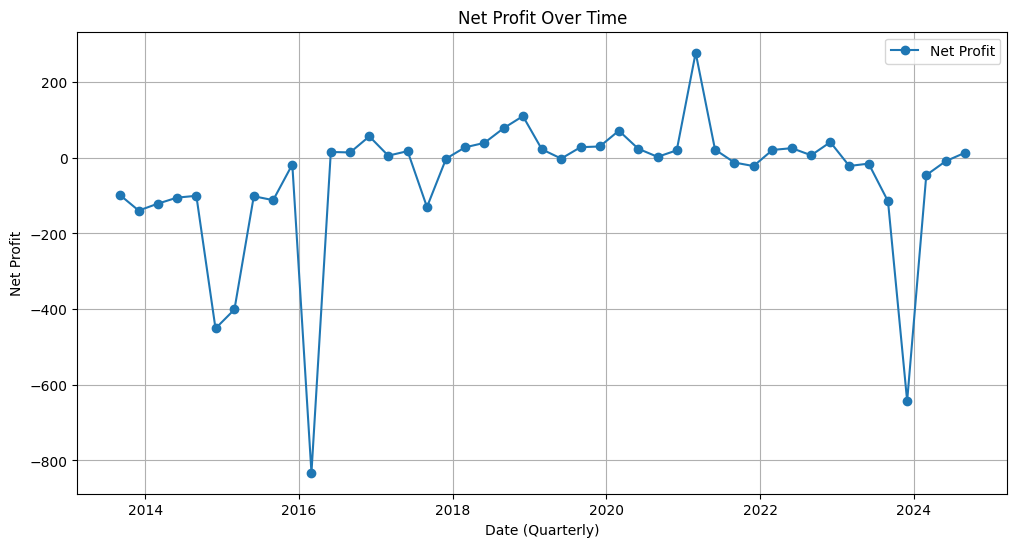

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("params.xlsx")

# Convert Quarter format to datetime (assuming column name is 'Quarter')
df['ds'] = pd.to_datetime(df['Quarter'].astype(str), format="%b '%y")
df['y'] = df["Net Profit"]  # Target variable

# Plot raw data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], marker='o', linestyle='-', label="Net Profit")
plt.xlabel("Date (Quarterly)")
plt.ylabel("Net Profit")
plt.title("Net Profit Over Time")
plt.legend()
plt.grid()
plt.show()


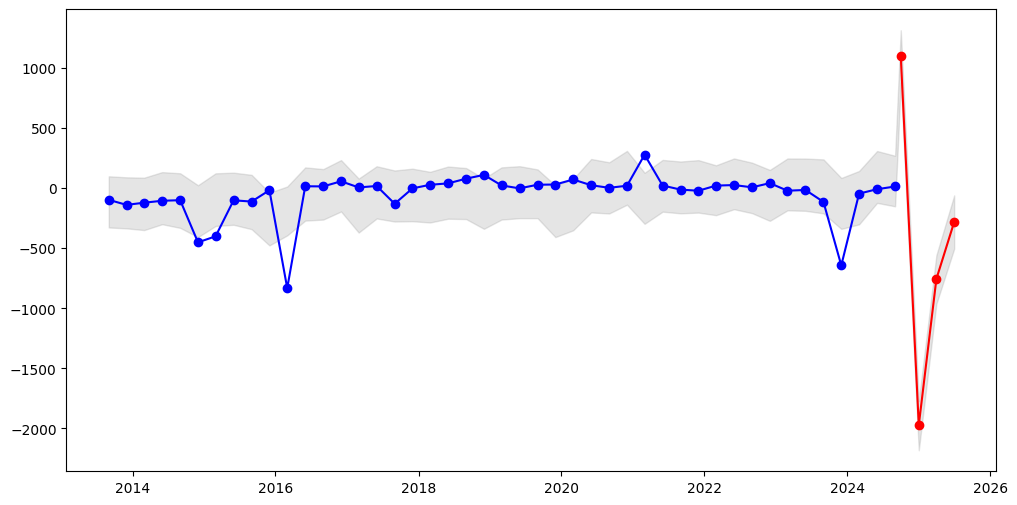

In [40]:
plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(df['ds'], df['y'], marker='o', linestyle='-', color='blue', label="Actual Net Profit")

# Split actual and predicted data
actual_dates = df['ds']
predicted_dates = forecast['ds'][-4:]  # Last 4 quarters (predicted)
predicted_values = forecast['yhat'][-4:]

# Plot predicted values in red
plt.plot(predicted_dates, predicted_values, marker='o', linestyle='-', color='red', label="Predicted Net Profit")

# Add confidence interval shading
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label="Confidence Interval")

NEW TRIALS

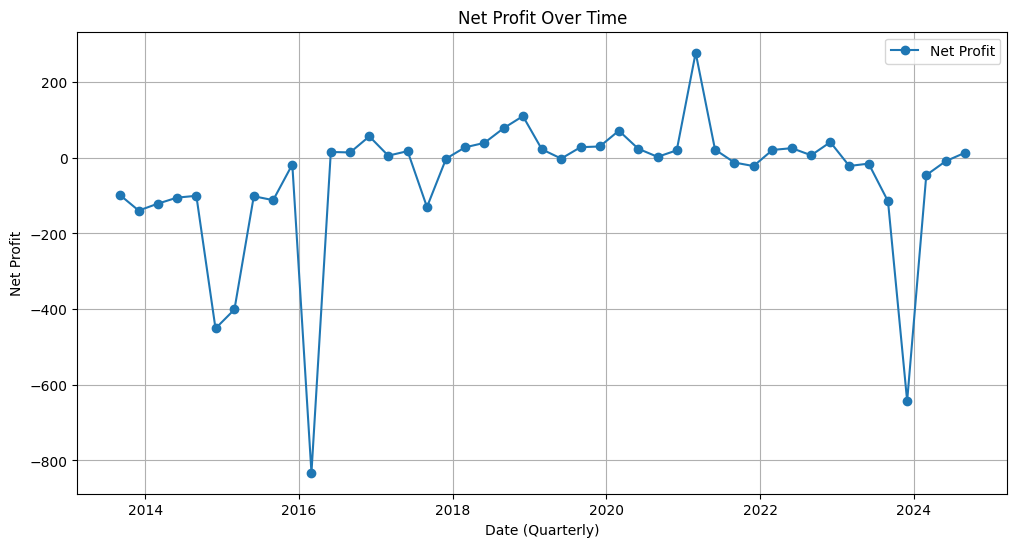

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel("params.xlsx")

# Convert Quarter format to datetime (assuming column name is 'Quarter')
df['ds'] = pd.to_datetime(df['Quarter'].astype(str), format="%b '%y")
df['y'] = df["Net Profit"]  # Target variable

# Plot raw data
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], marker='o', linestyle='-', label="Net Profit")
plt.xlabel("Date (Quarterly)")
plt.ylabel("Net Profit")
plt.title("Net Profit Over Time")
plt.legend()
plt.grid()
plt.show()


In [45]:
from prophet import Prophet

# Initialize Prophet model
model = Prophet()

# Add regressors
extra_features = ["Total Income From Operations", "Employees Cost", "depreciat", 
                  "Other Expenses", "Interest", "Exceptional Items", "P/L Before Tax"]
for feature in extra_features:
    model.add_regressor(feature)

# Train the model
model.fit(df)


00:17:09 - cmdstanpy - INFO - Chain [1] start processing
00:17:09 - cmdstanpy - INFO - Chain [1] done processing


c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  dates = pd.date_range(


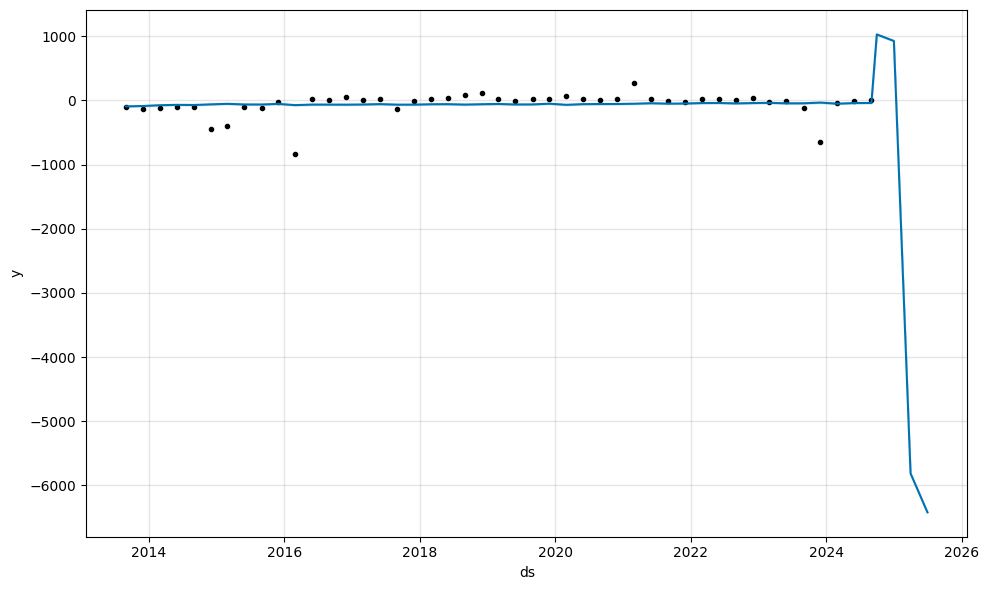

In [46]:
# Create future dataframe (4 quarters ahead)
future = model.make_future_dataframe(periods=4, freq='Q')

# Include extra regressors in future
for feature in extra_features:
    future[feature] = df[feature].mean()  # Using mean for missing future values

# Make predictions
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Get actual vs predicted values
actual = df['y']
predicted = forecast.loc[:len(actual)-1, 'yhat']  # Align sizes

# Compute errors
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 111.66
RMSE: 185.50
MAPE: 399.52%


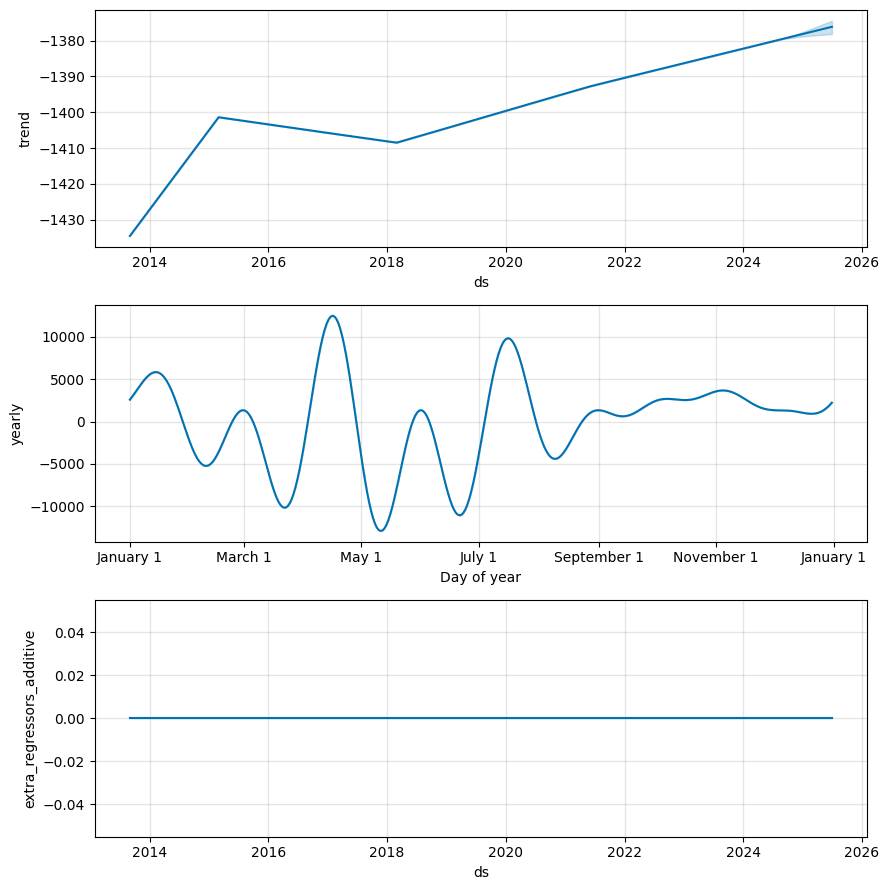

In [48]:
fig2 = model.plot_components(forecast)
plt.show()

In [49]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_excel("Pruned_Quarterly-resul_combined.xlsx")  # Replace with your file
data = data.rename(columns={"depreciat": "Depreciation"})  # Fix typos

# Feature engineering (example)
data["Total Expenses"] = data["Employees Cost"] + data["Depreciation"] + data["Other Expenses"]
data["Net Profit Lag1"] = data["Net Profit/(Loss) For the Period"].shift(1)
data["Rolling 4Q Profit"] = data["Net Profit/(Loss) For the Period"].rolling(4).mean()
data["Quarter Number"] = range(1, len(data) + 1)
data["Quarter of Year"] = [1, 2, 3, 4] * 11 + [1]  # Adjust for 45 quarters

# Drop NaNs from lagging
data = data.dropna()

# Define features and target
features = ["Net Sales/Income from operations", "Total Expenses", "Other Income", 
            "Interest", "Exceptional Items", "Net Profit Lag1", "Rolling 4Q Profit", 
            "Quarter Number", "Quarter of Year"]
X = data[features]
y = data["Net Profit/(Loss) For the Period"]

# Train-test split
train_size = 38
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

# Train XGBoost
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
print(importances.sort_values(ascending=False))

Validation RMSE: 31.606563501004892
Exceptional Items                   0.821403
Total Expenses                      0.133554
Net Sales/Income from operations    0.025223
Other Income                        0.011538
Interest                            0.004388
Quarter Number                      0.001598
Net Profit Lag1                     0.001233
Rolling 4Q Profit                   0.000800
Quarter of Year                     0.000263
dtype: float32


In [50]:
# Forecast Dec '24
last_row = data.iloc[-1].copy()
next_row = pd.DataFrame(columns=X.columns, index=[0])
next_row["Net Sales/Income from operations"] = last_row["Net Sales/Income from operations"] * 1.02  # Assume 2% growth
next_row["Total Expenses"] = last_row["Total Expenses"] * 1.01  # 1% increase
next_row["Other Income"] = last_row["Other Income"]
next_row["Interest"] = last_row["Interest"]
next_row["Exceptional Items"] = 0
next_row["Net Profit Lag1"] = last_row["Net Profit/(Loss) For the Period"]
next_row["Rolling 4Q Profit"] = data["Net Profit/(Loss) For the Period"].tail(4).mean()
next_row["Quarter Number"] = last_row["Quarter Number"] + 1
next_row["Quarter of Year"] = 2  # Dec

# Predict
dec_24_profit = model.predict(next_row)
print(f"Predicted Net Profit for Dec '24: {dec_24_profit[0]}")

Predicted Net Profit for Dec '24: 9.678102493286133


GROK BHAI CLUTCH

In [52]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Cell 2: Load the Data
# Assuming you’ve saved the data as a CSV or copied it into a file
# If not, paste the table into a CSV file named 'financial_data.csv'
data = pd.read_excel("Pruned_Quarterly-resul_combined.xlsx") # Replace with your file path
data.head()  # Check the first 5 rows to ensure it loaded correctly

,Quarter,Net Sales/Income from operations,Total Income From Operations,Employees Cost,depreciat,Other Expenses,"P/L Before Other Inc. , Int., Excpt. Items & Tax",Other Income,"P/L Before Int., Excpt. Items & Tax",Interest,P/L Before Exceptional Items & Tax,Exceptional Items,P/L Before Tax,P/L After Tax from Ordinary Activities,Net Profit/(Loss) For the Period,Equity Share Capital,Basic EPS,Diluted EPS,Basic EPS.,Diluted EPS.
0,Sep '13,78.26,78.26,38.63,55.44,27.47,-43.28,21.86,-21.42,74.56,-95.98,-47.90,-95.98,-97.48,-97.48,571.94,-1.79,-1.79,-1.79,-1.79
1,Dec '13,90.95,90.95,43.95,67.07,30.53,-50.60,-1.12,-51.72,87.49,-139.21,-47.90,-139.21,-139.44,-139.44,571.94,-2.52,-2.52,-2.52,-2.52
2,Mar '14,79.08,79.08,41.18,57.31,27.76,-47.17,10.78,-36.39,64.37,-100.76,-35.85,-136.61,-121.33,-121.33,572.64,-1.58,-1.58,-2.20,-2.20
3,Jun '14,93.17,93.17,43.90,58.04,41.54,-50.31,1.39,-48.92,56.29,-105.21,-47.90,-105.21,-105.21,-105.21,576.34,-1.92,-1.92,-1.92,-1.92
4,Sep '14,108.29,108.29,42.54,52.49,61.74,-48.48,0.10,-48.38,52.02,-100.40,-47.90,-100.40,-100.40,-100.40,580.68,-1.82,-1.82,-1.82,-1.82


In [53]:
# Cell 3: Rename Columns for Clarity
data = data.rename(columns={
    'depreciat': 'Depreciation',  # Fix typo
    'Net Profit/(Loss) For the Period': 'Net_Profit'  # Simplify target name
})

# Drop redundant columns (if any)
data = data.drop(columns=['Total Income From Operations'], errors='ignore')  # Identical to Net Sales

# Check for missing values
print(data.isnull().sum())

# Convert Quarter to datetime for easier handling
data['Quarter'] = pd.to_datetime(data['Quarter'], format="%b '%y")
data = data.sort_values('Quarter')  # Ensure chronological order
data.head()

Quarter                                             0
Net Sales/Income from operations                    0
Employees Cost                                      0
Depreciation                                        0
Other Expenses                                      0
P/L Before Other Inc. , Int., Excpt. Items & Tax    0
Other Income                                        0
P/L Before Int., Excpt. Items & Tax                 0
Interest                                            0
P/L Before Exceptional Items & Tax                  0
Exceptional Items                                   0
P/L Before Tax                                      0
P/L After Tax from Ordinary Activities              0
Net_Profit                                          0
Equity Share Capital                                0
Basic EPS                                           0
Diluted EPS                                         0
Basic EPS.                                          0
Diluted EPS.                

,Quarter,Net Sales/Income from operations,Employees Cost,Depreciation,Other Expenses,"P/L Before Other Inc. , Int., Excpt. Items & Tax",Other Income,"P/L Before Int., Excpt. Items & Tax",Interest,P/L Before Exceptional Items & Tax,Exceptional Items,P/L Before Tax,P/L After Tax from Ordinary Activities,Net_Profit,Equity Share Capital,Basic EPS,Diluted EPS,Basic EPS.,Diluted EPS.
0,2013-09-01,78.26,38.63,55.44,27.47,-43.28,21.86,-21.42,74.56,-95.98,-47.90,-95.98,-97.48,-97.48,571.94,-1.79,-1.79,-1.79,-1.79
1,2013-12-01,90.95,43.95,67.07,30.53,-50.60,-1.12,-51.72,87.49,-139.21,-47.90,-139.21,-139.44,-139.44,571.94,-2.52,-2.52,-2.52,-2.52
2,2014-03-01,79.08,41.18,57.31,27.76,-47.17,10.78,-36.39,64.37,-100.76,-35.85,-136.61,-121.33,-121.33,572.64,-1.58,-1.58,-2.20,-2.20
3,2014-06-01,93.17,43.90,58.04,41.54,-50.31,1.39,-48.92,56.29,-105.21,-47.90,-105.21,-105.21,-105.21,576.34,-1.92,-1.92,-1.92,-1.92
4,2014-09-01,108.29,42.54,52.49,61.74,-48.48,0.10,-48.38,52.02,-100.40,-47.90,-100.40,-100.40,-100.40,580.68,-1.82,-1.82,-1.82,-1.82


In [54]:
# Cell 4: Feature Engineering
# Derived financial features
data['Total_Expenses'] = data['Employees Cost'] + data['Depreciation'] + data['Other Expenses']
data['Operating_Profit_Margin'] = data['P/L Before Other Inc. , Int., Excpt. Items & Tax'] / data['Net Sales/Income from operations']
data['Interest_Coverage'] = data['P/L Before Int., Excpt. Items & Tax'] / data['Interest'].replace(0, np.nan)  # Avoid division by zero

# Time-based features
data['Quarter_Number'] = range(1, len(data) + 1)
data['Quarter_of_Year'] = data['Quarter'].dt.month.map({9: 1, 12: 2, 3: 3, 6: 4})  # Sep=1, Dec=2, Mar=3, Jun=4

# Lagged features
data['Net_Profit_Lag1'] = data['Net_Profit'].shift(1)
data['Net_Sales_Lag1'] = data['Net Sales/Income from operations'].shift(1)
data['Total_Expenses_Lag1'] = data['Total_Expenses'].shift(1)

# Rolling averages (4 quarters = 1 year)
data['Rolling_4Q_Profit'] = data['Net_Profit'].rolling(window=4, min_periods=1).mean()

# Handle infinite values from division
data = data.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN (from lagging/rolling)
data = data.dropna()
data.head()

,Quarter,Net Sales/Income from operations,Employees Cost,Depreciation,Other Expenses,"P/L Before Other Inc. , Int., Excpt. Items & Tax",Other Income,"P/L Before Int., Excpt. Items & Tax",Interest,P/L Before Exceptional Items & Tax,...,Diluted EPS.,Total_Expenses,Operating_Profit_Margin,Interest_Coverage,Quarter_Number,Quarter_of_Year,Net_Profit_Lag1,Net_Sales_Lag1,Total_Expenses_Lag1,Rolling_4Q_Profit
1,2013-12-01,90.95,43.95,67.07,30.53,-50.60,-1.12,-51.72,87.49,-139.21,...,-2.52,141.55,-0.556350,-0.591153,2,2,-97.48,78.26,121.54,-118.460000
2,2014-03-01,79.08,41.18,57.31,27.76,-47.17,10.78,-36.39,64.37,-100.76,...,-2.20,126.25,-0.596485,-0.565325,3,3,-139.44,90.95,141.55,-119.416667
3,2014-06-01,93.17,43.90,58.04,41.54,-50.31,1.39,-48.92,56.29,-105.21,...,-1.92,143.48,-0.539981,-0.869071,4,4,-121.33,79.08,126.25,-115.865000
4,2014-09-01,108.29,42.54,52.49,61.74,-48.48,0.10,-48.38,52.02,-100.40,...,-1.82,156.77,-0.447687,-0.930027,5,1,-105.21,93.17,143.48,-116.595000
5,2014-12-01,105.80,40.21,55.05,78.29,-67.75,0.41,-67.34,52.03,-119.37,...,-7.84,173.55,-0.640359,-1.294253,6,2,-100.40,108.29,156.77,-194.530000


In [55]:
# Cell 5: Define Features and Target
features = [
    'Net Sales/Income from operations', 'Total_Expenses', 'Other Income', 
    'Interest', 'Exceptional Items', 'Net_Profit_Lag1', 'Net_Sales_Lag1', 
    'Total_Expenses_Lag1', 'Rolling_4Q_Profit', 'Quarter_Number', 'Quarter_of_Year'
]
X = data[features]
y = data['Net_Profit']

# Train-validation split (last 7 quarters for validation)
train_size = len(data) - 7
X_train, X_val = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_val = y.iloc[:train_size], y.iloc[train_size:]

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}")

Training samples: 37, Validation samples: 7


In [56]:
# Cell 6: Train XGBoost Model
model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Validation RMSE: {rmse}")

Validation RMSE: 25.378106269765492


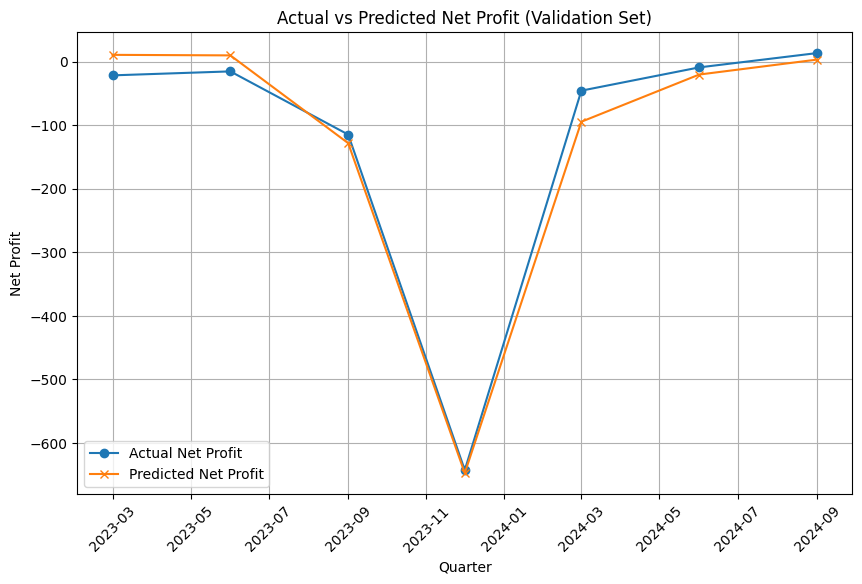

Feature Importances:
Exceptional Items                   0.722784
Total_Expenses                      0.170266
Quarter_Number                      0.067020
Net Sales/Income from operations    0.021180
Other Income                        0.007217
Interest                            0.002888
Net_Sales_Lag1                      0.002522
Net_Profit_Lag1                     0.002504
Total_Expenses_Lag1                 0.001740
Rolling_4Q_Profit                   0.001655
Quarter_of_Year                     0.000225
dtype: float32


In [57]:
# Cell 7: Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(data['Quarter'].iloc[-7:], y_val, label='Actual Net Profit', marker='o')
plt.plot(data['Quarter'].iloc[-7:], y_pred, label='Predicted Net Profit', marker='x')
plt.xlabel('Quarter')
plt.ylabel('Net Profit')
plt.title('Actual vs Predicted Net Profit (Validation Set)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Feature importance
importances = pd.Series(model.feature_importances_, index=features)
print("Feature Importances:")
print(importances.sort_values(ascending=False))

In [58]:
# Cell 8: Forecast Dec '24
last_row = data.iloc[-1].copy()
next_row = pd.DataFrame(columns=features, index=[0])

# Assumptions for next quarter
next_row['Net Sales/Income from operations'] = last_row['Net Sales/Income from operations'] * 1.02  # 2% growth
next_row['Total_Expenses'] = last_row['Total_Expenses'] * 1.01  # 1% increase
next_row['Other Income'] = last_row['Other Income']
next_row['Interest'] = last_row['Interest']
next_row['Exceptional Items'] = 0  # Assume no one-offs
next_row['Net_Profit_Lag1'] = last_row['Net_Profit']
next_row['Net_Sales_Lag1'] = last_row['Net Sales/Income from operations']
next_row['Total_Expenses_Lag1'] = last_row['Total_Expenses']
next_row['Rolling_4Q_Profit'] = data['Net_Profit'].tail(4).mean()
next_row['Quarter_Number'] = last_row['Quarter_Number'] + 1
next_row['Quarter_of_Year'] = 2  # Dec

# Predict
dec_24_profit = model.predict(next_row)
print(f"Predicted Net Profit for Dec '24: {dec_24_profit[0]}")

Predicted Net Profit for Dec '24: 17.885042190551758


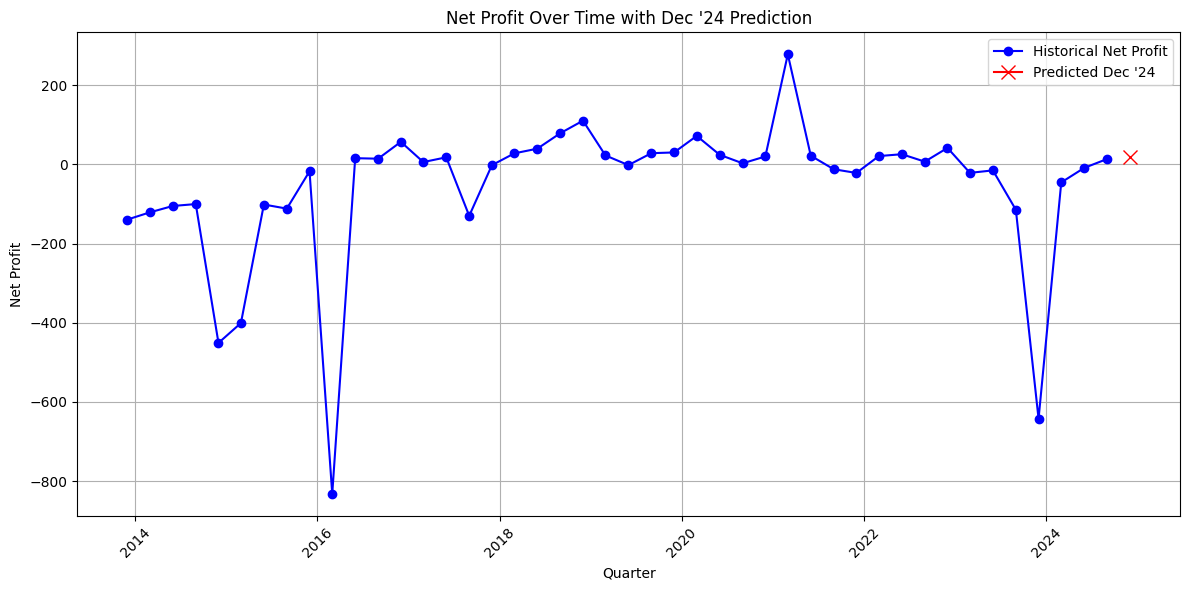

In [68]:
# Cell 10: Plot Original Net Profit with Dec '24 Prediction
# Prepare the data
historical_dates = data['Quarter']
historical_profits = data['Net_Profit']

# Add the forecasted Dec '24 data
forecast_date = pd.to_datetime("Dec '24", format="%b '%y")  # Match your Quarter format
forecast_profit = dec_24_profit[0]  # From Step 7

# Combine historical and forecast data
all_dates = pd.concat([pd.Series(historical_dates), pd.Series([forecast_date])])
all_profits = pd.concat([pd.Series(historical_profits), pd.Series([forecast_profit])])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_profits, label='Historical Net Profit', marker='o', color='blue')
plt.plot(forecast_date, forecast_profit, label='Predicted Dec \'24', marker='x', color='red', markersize=10)
plt.xlabel('Quarter')
plt.ylabel('Net Profit')
plt.title('Net Profit Over Time with Dec \'24 Prediction')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

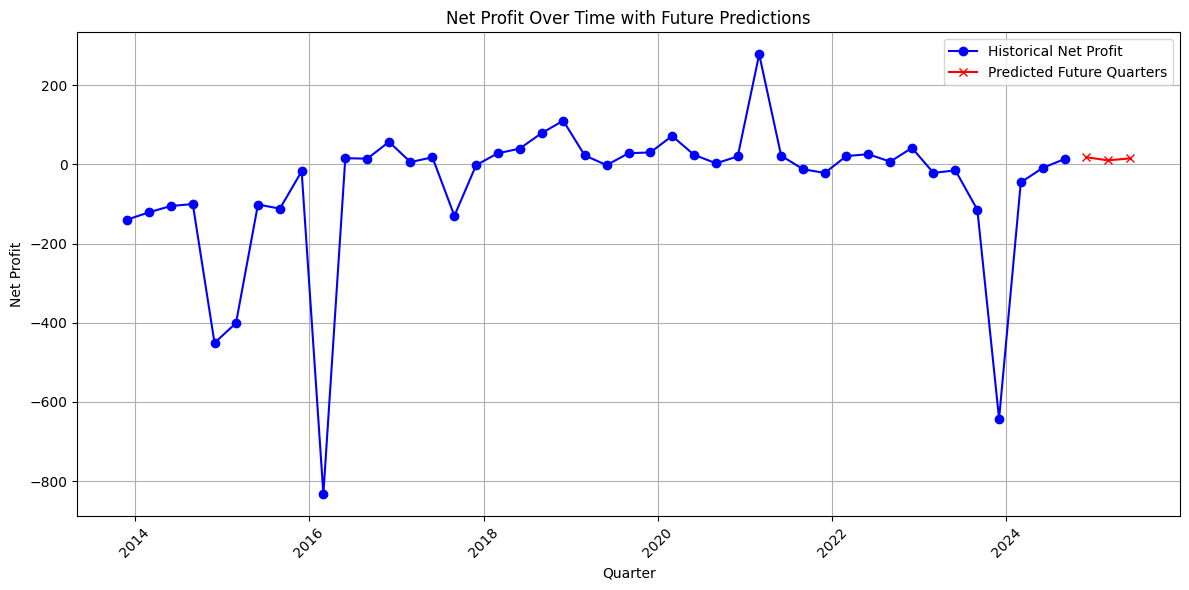

In [ ]:
# Cell 11: Plot with Multiple Future Predictions
# Assume you’ve forecasted Mar '25 and Jun '25 similarly to Dec '24
future_dates = pd.to_datetime(["Dec '24", "Mar '25", "Jun '25"], format="%b '%y")
future_profits = [dec_24_profit[0], 10.0, 15.0]  # Replace with your actual predictions

# Combine all data
all_dates = pd.concat([pd.Series(historical_dates), pd.Series(future_dates)])
all_profits = pd.concat([pd.Series(historical_profits), pd.Series(future_profits)])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(historical_dates, historical_profits, label='Historical Net Profit', marker='o', color='blue')
plt.plot(future_dates, future_profits, label='Predicted Future Quarters', marker='x', color='red')
plt.xlabel('Quarter')
plt.ylabel('Net Profit')
plt.title('Net Profit Over Time with Future Predictions')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 14: Predict and Store Future Profits
import pandas as pd

# Features used by the model
features = [
    'Net Sales/Income from operations', 'Total_Expenses', 'Other Income', 
    'Interest', 'Exceptional Items', 'Net_Profit_Lag1', 'Net_Sales_Lag1', 
    'Total_Expenses_Lag1', 'Rolling_4Q_Profit', 'Quarter_Number', 'Quarter_of_Year'
]

# Initialize forecast DataFrame
forecast_periods = 8
future_dates = pd.date_range(start="2024-12-01", periods=forecast_periods, freq='Q')
future_data = pd.DataFrame(index=range(forecast_periods), columns=features)

# Start with last historical row (Sep '24)
last_row = data.iloc[-1].copy()

# Assumptions
growth_rate_sales = 1.02  # 2% quarterly growth
growth_rate_expenses = 1.01  # 1% quarterly increase

# Fill initial row (Dec '24)
future_data.loc[0, 'Net Sales/Income from operations'] = float(last_row['Net Sales/Income from operations'] * growth_rate_sales)
future_data.loc[0, 'Total_Expenses'] = float(last_row['Total_Expenses'] * growth_rate_expenses)
future_data.loc[0, 'Other Income'] = float(last_row['Other Income'])
future_data.loc[0, 'Interest'] = float(last_row['Interest'])
future_data.loc[0, 'Exceptional Items'] = 0.0
future_data.loc[0, 'Net_Profit_Lag1'] = float(last_row['Net_Profit'])
future_data.loc[0, 'Net_Sales_Lag1'] = float(last_row['Net Sales/Income from operations'])
future_data.loc[0, 'Total_Expenses_Lag1'] = float(last_row['Total_Expenses'])
future_data.loc[0, 'Rolling_4Q_Profit'] = float(data['Net_Profit'].tail(4).mean())
future_data.loc[0, 'Quarter_Number'] = int(last_row['Quarter_Number'] + 1)
future_data.loc[0, 'Quarter_of_Year'] = 2  # Dec

# Convert to numeric
future_data[features] = future_data[features].astype(float)

# Store predictions in "Quarter", "Profit" format
future_profits = pd.DataFrame({
    'Quarter': future_dates.strftime("%b '%y"),
    'Profit': [0.0] * forecast_periods  # Placeholder for predictions
})

# Predict iteratively
for i in range(forecast_periods):
    # Predict current quarter
    pred = model.predict(future_data.loc[[i], features])[0]
    future_profits.loc[i, 'Profit'] = pred
    
    # Prepare next quarter (if not the last)
    if i < forecast_periods - 1:
        future_data.loc[i+1, 'Net Sales/Income from operations'] = future_data.loc[i, 'Net Sales/Income from operations'] * growth_rate_sales
        future_data.loc[i+1, 'Total_Expenses'] = future_data.loc[i, 'Total_Expenses'] * growth_rate_expenses
        future_data.loc[i+1, 'Other Income'] = future_data.loc[i, 'Other Income']
        future_data.loc[i+1, 'Interest'] = future_data.loc[i, 'Interest']
        future_data.loc[i+1, 'Exceptional Items'] = 0.0
        future_data.loc[i+1, 'Net_Profit_Lag1'] = pred
        future_data.loc[i+1, 'Net_Sales_Lag1'] = future_data.loc[i, 'Net Sales/Income from operations']
        future_data.loc[i+1, 'Total_Expenses_Lag1'] = future_data.loc[i, 'Total_Expenses']
        future_data.loc[i+1, 'Rolling_4Q_Profit'] = (
            float((data['Net_Profit'].tail(4-(i+1)).sum() + future_data.loc[:i, 'Net_Profit_Lag1'].sum()) / 4)
            if i < 3 else float(future_data.loc[i-3:i+1, 'Net_Profit_Lag1'].mean())
        )
        future_data.loc[i+1, 'Quarter_Number'] = future_data.loc[i, 'Quarter_Number'] + 1
        future_data.loc[i+1, 'Quarter_of_Year'] = [3, 4, 1, 2, 3, 4, 1][i]  # Mar, Jun, Sep, Dec cycle

# Display the result
print("Future Profits (Dec '24 - Sep '26):")
print(future_profits)


Future Profits (Dec '24 - Sep '26):
   Quarter     Profit
0  Dec '24  17.885042
1  Mar '25   5.266169
2  Jun '25   5.267839
3  Sep '25   5.005060
4  Dec '25   5.005060
5  Mar '26  14.785773
6  Jun '26  15.239995
7  Sep '26  14.977215


C:\Users\rayya\AppData\Local\Temp\ipykernel_19596\2557043293.py:13: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  future_dates = pd.date_range(start="2024-12-01", periods=forecast_periods, freq='Q')


In [80]:
# Cell 13: Create Table of Historical and Predicted Net Profit
# Historical data
historical_dates = data['Quarter']
historical_profits = data['Net_Profit']
historical_table = pd.DataFrame({
    'Quarter': historical_dates,
    'Net_Profit': historical_profits,
    'Type': 'Historical'
})

# Predicted data (from Cell 12)
future_dates = data['Quarter']
future_profits = data['Net_Profit']
future_table = pd.DataFrame({
    'Quarter': future_dates,
    'Net_Profit': future_profits,
    'Type': 'Predicted'
})

# Combine all data
combined_table = pd.concat([historical_table, future_table], ignore_index=True)

# Display the table
print("Combined Historical and Predicted Net Profit:")
print(combined_table)


Combined Historical and Predicted Net Profit:
      Quarter  Net_Profit        Type
0  2013-12-01     -139.44  Historical
1  2014-03-01     -121.33  Historical
2  2014-06-01     -105.21  Historical
3  2014-09-01     -100.40  Historical
4  2014-12-01     -451.18  Historical
..        ...         ...         ...
83 2023-09-01     -114.78   Predicted
84 2023-12-01     -642.91   Predicted
85 2024-03-01      -45.64   Predicted
86 2024-06-01       -9.00   Predicted
87 2024-09-01       13.53   Predicted

[88 rows x 3 columns]
